### Iris flower classification using Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
data = load_iris(as_frame=True)

In [3]:
iris = data['data']
iris['target'] = data['target']

In [4]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
iris.groupby('target').agg('mean')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


There are three classification targets in the entire dataset. The dataset is only 150 rows with non-null rows.   
The aggregate for the three classes show no signifant differences in the features except for the petal length and width which shows some diffences for the class 0 compared to class 1 and 2. 

### Visualisations



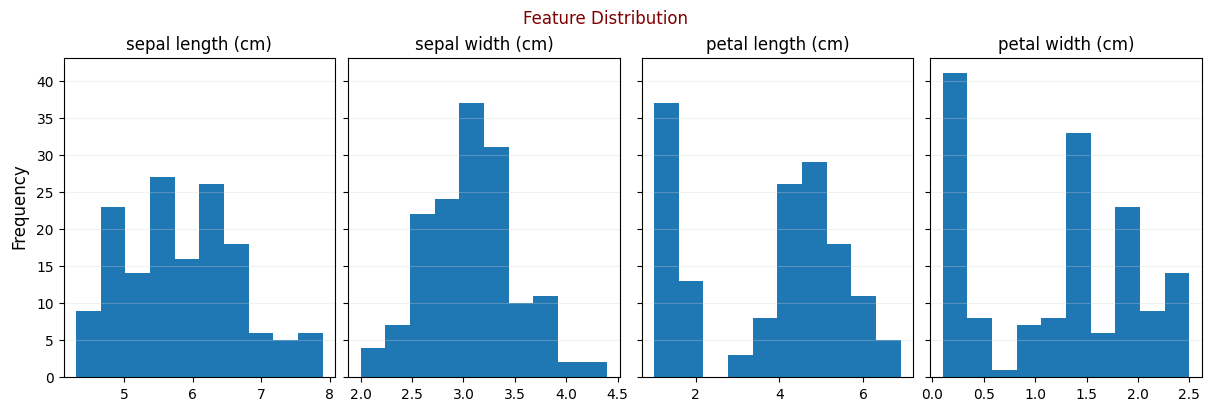

In [9]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#from matplotlib.ticker import NullLocator, NullFormatter, AutoLocator
fig, ax = plt.subplots(1, 4, figsize=(12, 4), layout='constrained', sharey=True)
fig.suptitle('Feature Distribution', c='maroon')
fig.supylabel('Frequency')
for idx, col in enumerate(cols):
    ax[idx].hist(iris[col])
    ax[idx].set_title(col)
    ax[idx].yaxis.grid(linestyle='-', which='major', color='lightgrey',alpha=0.3)
plt.show()

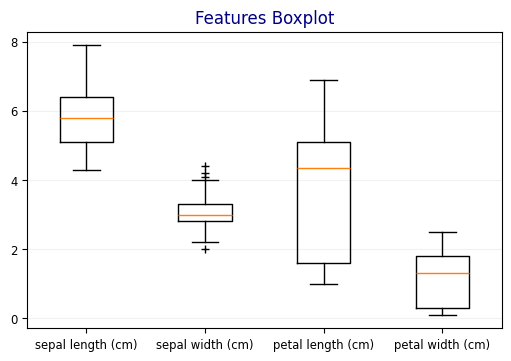

In [10]:
fig, ax = plt.subplots(figsize=(5, 3.5), layout='constrained')

bp = ax.boxplot(x=iris[cols],tick_labels=cols)
ax.set_title('Features Boxplot', c='navy')

plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')
plt.xticks(fontsize='small')
plt.yticks(np.arange(0, 10, 2), fontsize='small')
ax.yaxis.grid(linestyle='-', which='major', color='lightgrey',alpha=0.3)
plt.show()

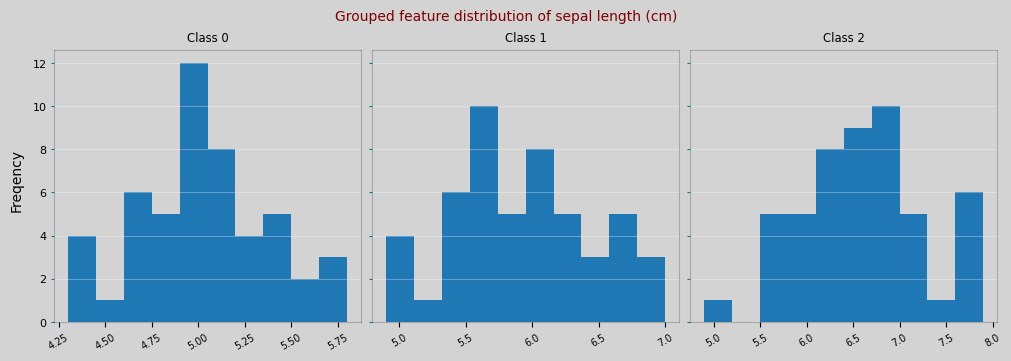

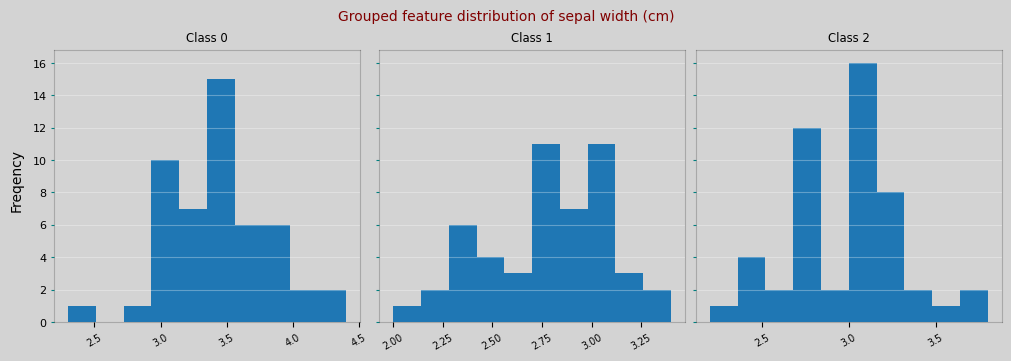

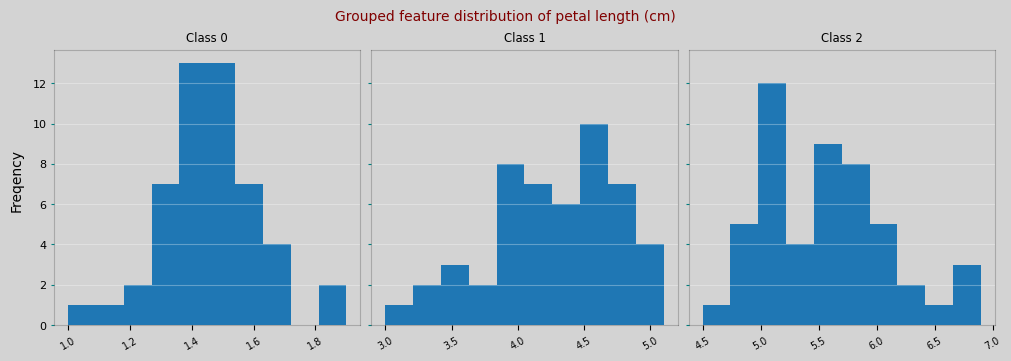

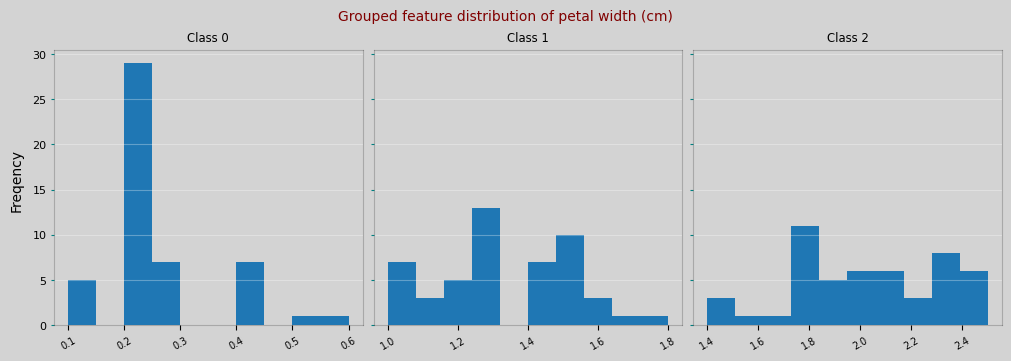

In [11]:
iris_group = iris.groupby('target') 

for col in cols:
    fig, ax = plt.subplots(1, 3, figsize=(10,3.5), layout='constrained', sharey=True)
    fig.set_facecolor(color='lightgrey')
    fig.suptitle(f'Grouped feature distribution of {col}', c='maroon', fontsize='medium')
    fig.supylabel('Freqency', size='medium')
   
    for group in range(3):
        group_x = iris_group.get_group(group)
        ax[group].hist(group_x[col])
        ax[group].set_title(f'Class {group}', fontsize='small')
        ax[group].yaxis.grid(linestyle='-', which='major', color='white',alpha=0.3)
        ax[group].set_facecolor('lightgrey')
        x_labels = ax[group].get_xticklabels(which='major')
        plt.setp(x_labels, fontsize='x-small', rotation=30)
        ax[group].tick_params(axis='y', labelsize=8, length=2, color='teal')
        ax[group].spines[:].set_alpha(0.2)

    plt.show()

###

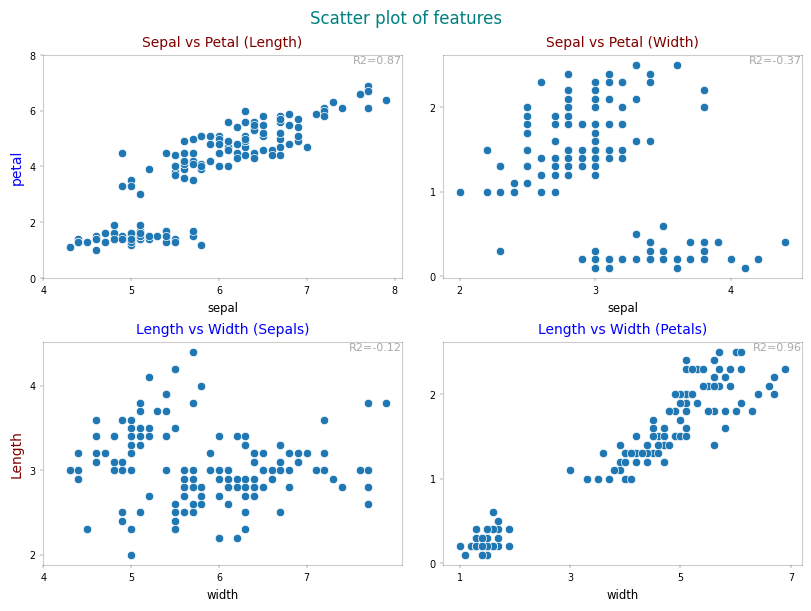

In [12]:
def cal_corr(feature_1, feature_2):
    r2_val = round(iris[[feature_1, feature_2]].corr()[feature_1].tolist()[1], 2)
    return r2_val

def annotate_axis(axs, text):
    axs.text(1,1, ha='right', va='top', 
             transform=axs.transAxes, s=f'R2={text}', 
             fontsize=8, color='darkgrey'
            )

sepals = cols[:2]
petals = cols[2:]


fig, axd = plt.subplots(2,2, figsize=(8, 6), layout='constrained')
fig.suptitle('Scatter plot of features', fontsize='large', c='teal')

a1 = sns.scatterplot(data=iris, x=sepals[0], y=petals[0], ax=axd[0,0])
a1.set_title('Sepal vs Petal (Length)', size='medium', c='maroon')
a1.set_ylabel('petal', size='medium', c='blue')
a1.set_xlabel('sepal', size='small')
a1.tick_params(axis='both',labelsize='x-small', length=2, width=0.2)
a1.spines[:].set_alpha(0.2)
a1.set_xticks(ticks=np.arange(4,9,1))
a1.set_yticks(ticks=np.arange(0,9,2))
r2 = cal_corr(sepals[0], petals[0])
annotate_axis(a1, r2)

a2 = sns.scatterplot(data=iris, x=sepals[1], y=petals[1], ax=axd[0,1])
a2.set_title('Sepal vs Petal (Width)', size='medium', c='maroon')
a2.set_ylabel(' ')
a2.set_xlabel('sepal', size='small')
a2.tick_params(axis='both',labelsize='x-small', length=2, width=0.2)
a2.spines[:].set_alpha(0.2)
a2.set_xticks(ticks=np.arange(2,5,1))
a2.set_yticks(ticks=np.arange(0,3,1))
r2 = cal_corr(sepals[1], petals[1])
annotate_axis(a2, r2)

a3 = sns.scatterplot(data=iris, x=sepals[0], y=sepals[1], ax=axd[1,0])
a3.set_title('Length vs Width (Sepals)', size='medium', c='blue')
a3.set_ylabel('Length', fontsize='medium', c='maroon')
a3.set_xlabel('width', size='small')
a3.tick_params(axis='both',labelsize='x-small', length=2, width=0.2)
a3.spines[:].set_alpha(0.2)
a3.set_xticks(ticks=np.arange(4,8,1))
a3.set_yticks(ticks=np.arange(2,5,1))
r2 = cal_corr(sepals[0], sepals[1])
annotate_axis(a3, r2)

a4 = sns.scatterplot(data=iris, x=petals[0], y=petals[1], ax=axd[1,1])
a4.set_title('Length vs Width (Petals)', size='medium', c='blue')
a4.set_ylabel(' ')
a4.set_xlabel('width', size='small')
a4.tick_params(axis='both',labelsize='x-small', length=2, width=0.2)
a4.spines[:].set_alpha(0.2)
a4.set_xticks(ticks=np.arange(1,8,2))
a4.set_yticks(ticks=np.arange(0,3,1))
r2 = cal_corr(petals[0], petals[1])
annotate_axis(a4, r2)

plt.show()

The overall features of the entire dataset tend to have a normal distribution regardless of the target class. However, some outliers were observed from the boxplot of the sepal width feature.  In the scatter plot, the length and width of Petal have strong correlations. The sepal and petal length also have good correlations while the scatterplots of the width do not show strong correlations for the features. 

### Feature selection and preprocessing  

The features will be slit into 80:20 for training and testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = iris.drop('target', axis=1)
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=217)

In [15]:
## Checking the robustness of the split for all classes
y_test.value_counts()

target
0    11
1    11
2     8
Name: count, dtype: int64

In [16]:
y_train.value_counts()

target
2    42
1    39
0    39
Name: count, dtype: int64

### Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
iris_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=217)

iris_tree.fit(X_train, y_train)
y_predicted = iris_tree.predict(X_test)

compare = pd.DataFrame(data = {'True Y':y_test, 
                               'Pred Y':y_predicted
                              }
                      ).reset_index().drop('index', axis=1)
compare.head()

,True Y,Pred Y
0,0,0
1,2,1
2,2,1
3,2,2
4,1,1


In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      1.00      0.92        11
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30



In [20]:
from sklearn.metrics import confusion_matrix
confusion_score = confusion_matrix(y_test, y_predicted)
confusion_score

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  6]])

##### model outcome
Looking at the classification report, the model performed very well on the test data with 93% accuracy and hig precision.    
Evaluating the model performance using confusion matrix also reveals that the classes 0 and 1 were predicted more accurately compared to the class 2. 

Next step I will try and do some optimisations of the classification tree to see if i can improve the performance. 

### cost complexity pruning optimisation and grid search

In [21]:
class_tree_alpha = DecisionTreeClassifier(criterion = 'gini', 
                                          max_depth = 3, 
                                          random_state = 217
                                         )
tree_alpha = class_tree_alpha.cost_complexity_pruning_path(X_train, y_train)
tree_alpha


{'ccp_alphas': array([0.        , 0.01961957, 0.27616747, 0.32921296]),
 'impurities': array([0.04125   , 0.06086957, 0.33703704, 0.66625   ])}

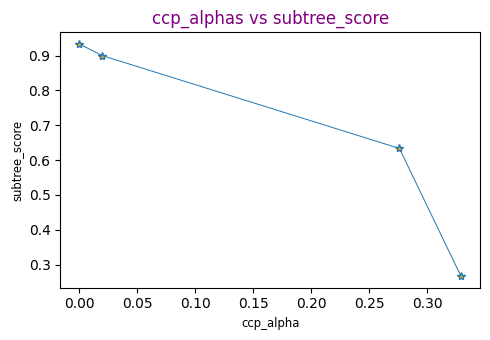

In [22]:
subtrees = []
for alpha in tree_alpha.ccp_alphas:
    tree = DecisionTreeClassifier(max_depth=3, random_state=217, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    subtrees.append(tree)

subtree_score = [subtree.score(X_test, y_test) for subtree in subtrees]

fig, axs = plt.subplots(figsize=(5,3.5), layout='tight')
axs.plot(tree_alpha.ccp_alphas, subtree_score, marker='*', markerfacecolor='orange', linewidth=0.7)
axs.set_title('ccp_alphas vs subtree_score', fontsize=12, color='purple')
axs.set_ylabel('subtree_score', fontsize='small')
axs.set_xlabel('ccp_alpha', fontsize='small')

plt.show()


optimum_alpha = max(tuple(zip(tree_alpha.ccp_alphas, subtree_score)), key=lambda x: x[1])


In [23]:
print(optimum_alpha)

(np.float64(0.0), 0.9333333333333333)


In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['entropy', 'gini'], 
              'max_depth': [2, 3, 4], 
              'min_samples_leaf': np.arange(1, 10, 2), 
              'class_weight': [None, 'balanced']
             }


tree_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=217), 
                         param_grid=parameters,
                         scoring = 'recall_macro',
                         n_jobs=-1, 
                         cv=10
                        )

tree_grid.fit(X, y)

print(tree_grid.best_params_)
print(tree_grid.best_score_)                       

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': np.int64(3)}
0.9666666666666666


In [25]:
#using the best estimator parameters
tree_grid.best_estimator_.score(X_test, y_test)

0.9333333333333333

In [26]:
best_estimator = tree_grid.best_estimator_
best_est_pred = best_estimator.predict(X_test)

In [27]:
gridsearch_matrix = confusion_matrix(y_test, best_est_pred)
print(gridsearch_matrix)

[[11  0  0]
 [ 0 10  1]
 [ 0  1  7]]


### Cross validation of the model

In [28]:
from sklearn.model_selection import cross_validate

tree = DecisionTreeClassifier(criterion = 'entropy', 
                              max_depth = 3, 
                              min_samples_leaf=3
                             )


cv_tree = cross_validate(tree, X, y,
                         scoring =['accuracy', 'recall_macro'],
                         cv= 10, 
                         n_jobs=-1)

                                   

In [29]:
cv_tree

{'fit_time': array([0.0030179 , 0.0030067 , 0.0030098 , 0.00400758, 0.00300837,
        0.00299335, 0.00299859, 0.00299859, 0.00254416, 0.00299621]),
 'score_time': array([0.00499797, 0.00854564, 0.00855541, 0.00453448, 0.00855994,
        0.00656462, 0.00556469, 0.00857806, 0.00501418, 0.00401235]),
 'test_accuracy': array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
        0.93333333, 0.93333333, 1.        , 1.        , 1.        ]),
 'test_recall_macro': array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
        0.93333333, 0.93333333, 1.        , 1.        , 1.        ])}

In [30]:
print(f"cross validation accuracy mean: {cv_tree['test_accuracy'].mean()*100:.1f}\n")
print(f"cross validation test recall_macro mean: {cv_tree['test_recall_macro'].mean()*100:.1f}")

cross validation accuracy mean: 96.7

cross validation test recall_macro mean: 96.7


Overall, there has been an improvement in the model following gridsearchcv optimisation.   This increased the accruacy of the model up to approximately 97%. Therefore I will use the gridsearch paramets as my final model for classification   

#### Visualisations

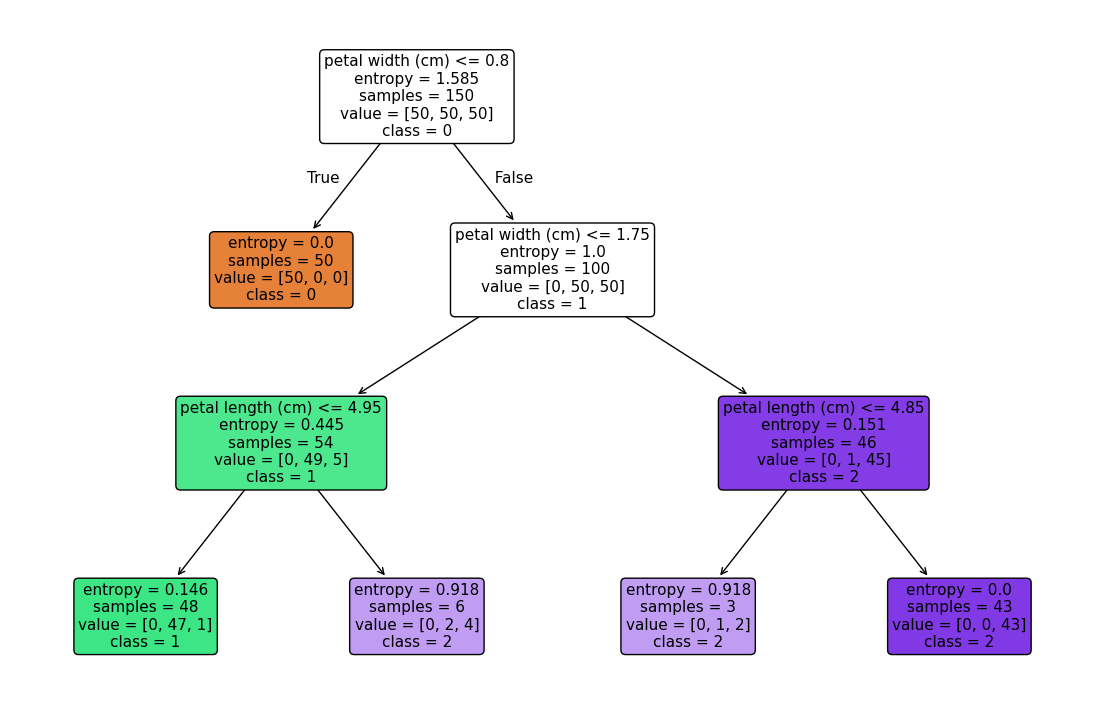

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14,9))

plot_tree(best_estimator, 
              class_names = best_estimator.classes_.astype(str),
              feature_names = X.columns,
              filled = True,
              precision = 3,
              proportion = False,
              rounded = True, 
              fontsize = 11
              )

plt.show()
              

### Summary

The Iris flower classification using DecisionTreeClassification performed quite well on the test data with an accuracy of 93% and the cross validation proved the model to be very robust with an accuracy and recall_macro of 97%. 

Based on the tree plot, the petal width is the biggest determinant of the class of the iris flower with petal width less than or equal to 0.8 exclusively classed as zero. The next level determinant is petal length which evaluates for length less than or equal to 4.95.  Length that evaluates to True and classed as 1 whereas the rest are classed as 2. 